In [1]:
import importlib
import os
import re
import folium
import netCDF4 as nc
import xarray as xr
import pandas as pd
import geopandas as gpd

import paths
from apollo import hydropoint

In [4]:
domain_weather = xr.open_mfdataset([paths.RAINFALL_UK])
domain_weather.to_dataframe()

tp
longitude latitude time                    
-8.0      60.0     1979-01-01  1.354898e-05
                   1979-01-02  1.287928e-04
                   1979-01-03  1.250765e-04
                   1979-01-04  5.525663e-05
                   1979-01-05  3.712731e-04
...                                     ...
 4.0      48.0     2021-12-27  2.950262e-04
                   2021-12-28  3.465652e-04
                   2021-12-29  6.249978e-04
                   2021-12-30  4.726053e-05
                   2021-12-31  3.587818e-08

[37710106 rows x 1 columns]

In [18]:
year = 2021
domain_weather = xr.open_mfdataset([paths.WEATHER_UK + f"/Rainfall/Rainfall_{year}_aggregated.nc"])
domain_weather

<xarray.Dataset> Size: 7MB
Dimensions:    (longitude: 49, latitude: 49, time: 365)
Coordinates:
  * longitude  (longitude) float32 196B -8.0 -7.75 -7.5 -7.25 ... 3.5 3.75 4.0
  * latitude   (latitude) float32 196B 60.0 59.75 59.5 59.25 ... 48.5 48.25 48.0
  * time       (time) datetime64[ns] 3kB 2021-01-01 2021-01-02 ... 2021-12-31
Data variables:
    tp         (time, latitude, longitude) float64 7MB dask.array<chunksize=(365, 49, 49), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-25 22:57:38 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [19]:
year = 1979
domain_weather = xr.open_mfdataset([paths.WEATHER_UK + f"/Rainfall/Rainfall_{year}_9to9.nc"])
x = domain_weather.to_dataframe()

section = x[24:48]

print(sum(section.values)/24)

section

[0.00017758]


tp
longitude latitude time                         
-8.0      60.0     1979-01-02 09:00:00  0.000056
                   1979-01-02 10:00:00  0.000460
                   1979-01-02 11:00:00  0.000597
                   1979-01-02 12:00:00  0.000014
                   1979-01-02 13:00:00  0.000004
                   1979-01-02 14:00:00  0.000084
                   1979-01-02 15:00:00  0.000286
                   1979-01-02 16:00:00  0.000290
                   1979-01-02 17:00:00  0.000156
                   1979-01-02 18:00:00  0.000067
                   1979-01-02 19:00:00  0.000150
                   1979-01-02 20:00:00  0.000066
                   1979-01-02 21:00:00  0.000118
                   1979-01-02 22:00:00  0.000127
                   1979-01-02 23:00:00  0.000149
                   1979-01-03 00:00:00  0.000073
                   1979-01-03 01:00:00  0.000087
                   1979-01-03 02:00:00  0.000098
                   1979-01-03 03:00:00  0.000068
                   1979-01-03 04:00:00  0.000279
                   1979-01-03 05:00:00  0.000492
                   1979-01-03 06:00:00  0.000523
                   1979-01-03 07:00:00  0.000007
                   1979-01-03 08:00:00  0.000010

In [20]:
domain_weather = xr.open_mfdataset([paths.WEATHER_UK + f"/Rainfall/Rainfall_{year}_aggregated_9to9.nc"])
domain_weather.to_dataframe()

tp
longitude latitude time                
-8.0      60.0     1979-01-01  0.000024
                   1979-01-02  0.000178
                   1979-01-03  0.000075
                   1979-01-04  0.000058
                   1979-01-05  0.000379
...                                 ...
 4.0      48.0     1979-12-27  0.004590
                   1979-12-28  0.004357
                   1979-12-29  0.004348
                   1979-12-30  0.004595
                   1979-12-31  0.002803

[876365 rows x 1 columns]

In [3]:
domain_snow = xr.open_mfdataset([paths.RAINFALL_UK_SHIFTED])
domain_snow.to_dataframe()

tp
longitude latitude time                    
-8.0      60.0     1979-01-01  2.435720e-05
                   1979-01-02  1.775846e-04
                   1979-01-03  7.542526e-05
                   1979-01-04  5.823740e-05
                   1979-01-05  3.789457e-04
...                                     ...
 4.0      48.0     2021-12-27  5.502098e-04
                   2021-12-28  3.274601e-04
                   2021-12-29  4.017459e-04
                   2021-12-30  5.040884e-06
                   2021-12-31  5.740508e-08

[37710106 rows x 1 columns]

In [2]:
catchment_nr = '54057'
shp_path = paths.CATCHMENT_BASINS + '/' + catchment_nr + '/' + catchment_nr + '.shp'
gdf = gpd.read_file(shp_path)
gdf.geometry.area/1000000

0    9885.4675
dtype: float64

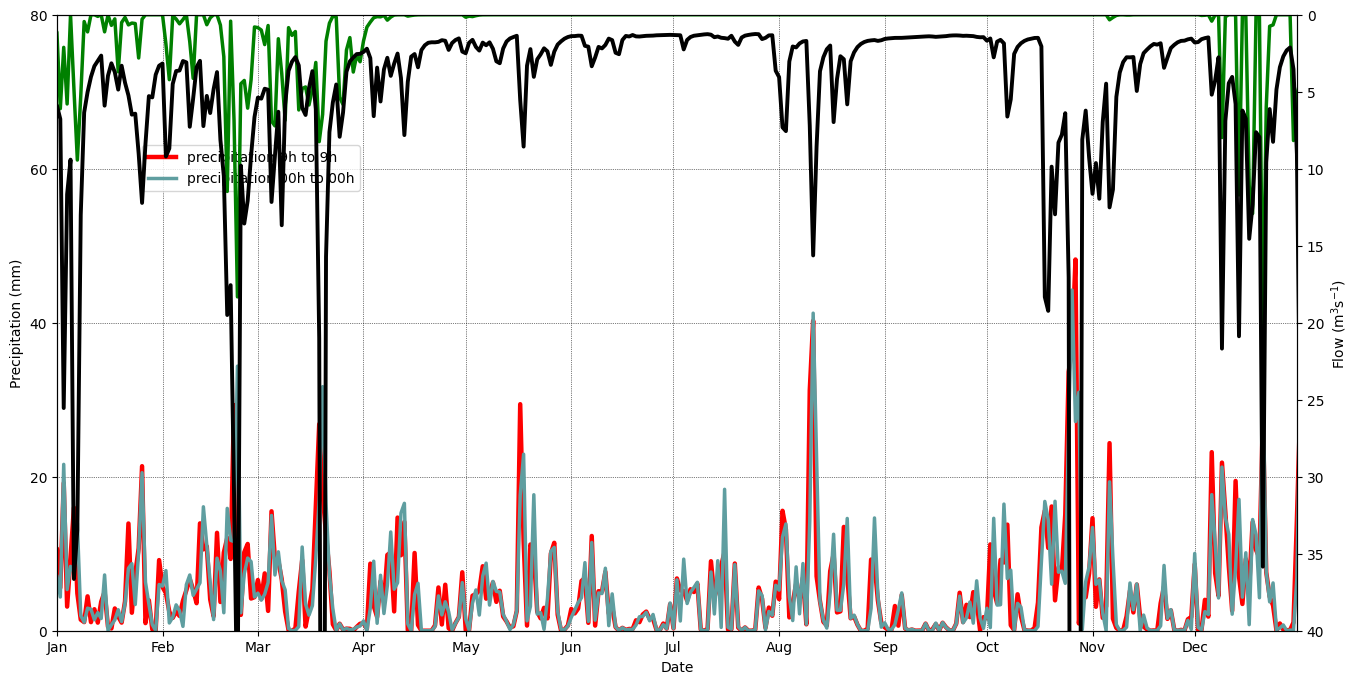

In [3]:
from train_model import load_data
import matplotlib.dates as mdt
import matplotlib.ticker as mtk
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

station_nr = 5004

year = 2014

rain_lim = 80

rf = load_data.load_data(paths.CATCHMENT_BASINS + '/' + str(station_nr) + '/' + str(str(station_nr) + '_lumped.csv'), verbose=False)
rf_9to9 =load_data.load_data(paths.CATCHMENT_BASINS + '/' + str(station_nr) + '/' + str(str(station_nr) + '_lumped_9to9.csv'), verbose=False)

fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.set_xlim([dt.date(year, 1, 1), dt.date(year, 12, 31)])
ax1.set_xlabel('Date')

ax1.xaxis.set_major_locator(mdt.MonthLocator())
ax1.xaxis.set_major_formatter(mdt.DateFormatter('%b'))

ax1.set_ylim(0,rain_lim)
ax1.set_ylabel('Precipitation (mm)')
ax1.yaxis.set_major_locator(mtk.MaxNLocator(5))

ax1.grid(c='black', ls='dotted', lw=0.5)

ax1.plot(rf_9to9['Date'],rf_9to9['Rain'], 'red', lw=3.2, ls='-', label='precipitation 9h to 9h')
ax1.plot(rf['Date'], rf['Rain'], 'cadetblue', lw=2.5, ls='-', label='precipitation 00h to 00h')

ax2 = ax1.twinx()

ax2.set_ylabel('Flow (m'+r'$^3$'+'s'+r'$^{-1}$'+')')

ax2.set_ylim(40,0)

ax2.plot(rf_9to9['Date'],rf_9to9['Snow Melt']*2, 'green', lw=2.5, ls='-', label='precipitation 9h to 9h')
ax2.plot(rf_9to9['Date'],rf_9to9['Flow'], 'black', lw=2.8, ls='-', label='Flow')

ax1.legend(loc=0, bbox_to_anchor=(0.25,0.8))

plt.show()

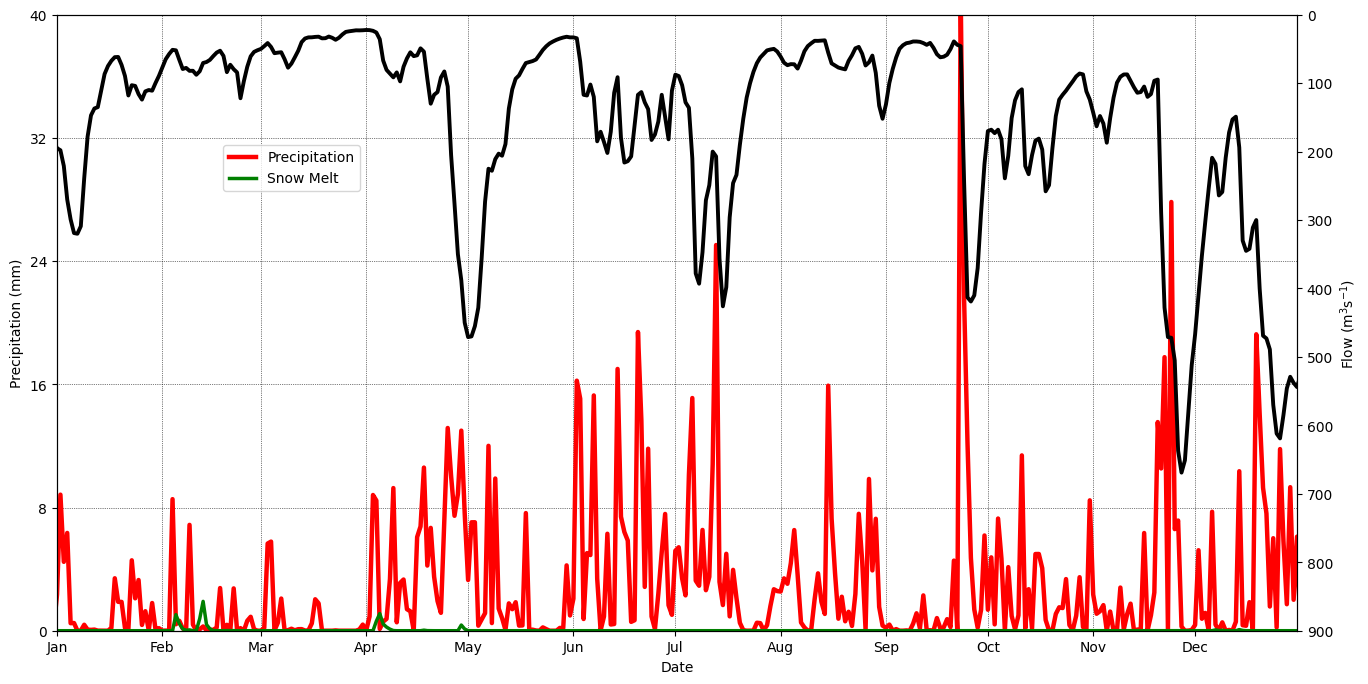

In [35]:
from train_model import load_data
import matplotlib.dates as mdt
import matplotlib.ticker as mtk
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

station_nr = 54057

year = 2012

rain_lim = 40

rf = load_data.load_data(paths.CATCHMENT_BASINS + '/' + str(station_nr) + '/' + str(str(station_nr) + '_lumped.csv'), verbose=False)
rf_9to9 =load_data.load_data(paths.CATCHMENT_BASINS + '/' + str(station_nr) + '/' + str(str(station_nr) + '_lumped_9to9.csv'), verbose=False)

fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.set_xlim([dt.date(year, 1, 1), dt.date(year, 12, 31)])
ax1.set_xlabel('Date')

ax1.xaxis.set_major_locator(mdt.MonthLocator())
ax1.xaxis.set_major_formatter(mdt.DateFormatter('%b'))

ax1.set_ylim(0,rain_lim)
ax1.set_ylabel('Precipitation (mm)')
ax1.yaxis.set_major_locator(mtk.MaxNLocator(5))

ax1.grid(c='black', ls='dotted', lw=0.5)

ax1.plot(rf_9to9['Date'],rf_9to9['Rain'], 'red', lw=3.2, ls='-', label='Precipitation')
ax1.plot(rf_9to9['Date'],rf_9to9['Snow Melt'], 'green', lw=2.5, ls='-', label='Snow Melt')

ax2 = ax1.twinx()

ax2.set_ylabel('Flow (m'+r'$^3$'+'s'+r'$^{-1}$'+')')

ax2.set_ylim(900,0)

ax2.plot(rf_9to9['Date'],rf_9to9['Flow'], 'black', lw=2.8, ls='-', label='Flow')

ax1.legend(loc=0, bbox_to_anchor=(0.25,0.8))

plt.show()

In [17]:
#visualize catchment basins

# Calculate the center
#total_bounds = gdf.total_bounds  
#center = [(total_bounds[1] + total_bounds[3]) / 2, (total_bounds[0] + total_bounds[2]) / 2]
center = [55, -0.5]

lat_start, lat_end, lat_step = 60, 48, -0.25
lon_start, lon_end, lon_step = -8, 4, 0.25

# Generate the range of latitude and longitude values
lat_range = np.arange(lat_start, lat_end + lat_step, lat_step)
lon_range = np.arange(lon_start, lon_end + lon_step, lon_step)

m = folium.Map(location=center, zoom_start=6)  

# Add horizontal lines to the map
for lat in lat_range:
    line = [(lat, lon_start), (lat, lon_end)]
    folium.PolyLine(locations=line, color='blue', weight=1).add_to(m)

for lon in lon_range:
    line = [(lat_start, lon), (lat_end, lon)]
    folium.PolyLine(locations=line, color='blue', weight=1).add_to(m)

for catchment_nr in os.listdir(paths.CATCHMENT_BASINS): #['7001', '33035', '33039', '54057']:

    shp_path = paths.CATCHMENT_BASINS + '/' + catchment_nr + '/' + catchment_nr + '.shp'
    gdf = gpd.read_file(shp_path)
    gdf = gdf.to_crs("EPSG:4326")
    layer = folium.GeoJson(gdf, name=catchment_nr).add_to(m)
    
folium.LayerControl().add_to(m)
m

In [3]:
import pandas as pd

def get_flow_df(station):
    flow = pd.read_csv(paths.CATCHMENT_BASINS + f'/{station}/{station}_gdf.csv')
    flow = flow.drop(flow.columns[2], axis=1)
    flow = flow.drop(flow.index[0:19])
    flow.columns = ['Date', 'Flow']
    flow['Date'] = pd.to_datetime(flow['Date'])
    flow['Flow'] = flow['Flow'].astype('Float64')
    return flow

In [130]:
stations =  [7001, 33039, 33035, 54057]
results = {}

for station in stations:
    flow = get_flow_df(station)
    flow['Date'] = pd.to_datetime(flow['Date'])  # Ensure the 'Date' column is in datetime format

    # Create an empty dictionary to store yearly sums for this station
    yearly_sums = {}

    # Iterate over the years from 1972 to 2022
    for year in range(1979, 2023):
        yearly_sum = flow[flow['Date'].dt.year == year]['Flow'].sum()
        yearly_sums[year] = yearly_sum

    # Add the yearly sums to the results dictionary with the station ID as the key
    results[station] = yearly_sums

# Convert the results dictionary to a DataFrame
yearly_flow_df = pd.DataFrame(results).transpose()

# Reset the index to have the station IDs as a column
yearly_flow_df.reset_index(inplace=True)
yearly_flow_df.rename(columns={'index': 'Station'}, inplace=True)
yearly_flow_df

Station       1979       1980       1981       1982       1983       1984  \
0     7001   5806.108   5276.671   5581.894   6341.172   5882.326   5275.659   
1    33039   6020.960   4706.960   4574.960   4794.400   4077.120   3844.350   
2    33035   7816.300   5659.200   6582.200   6481.200   6735.100   5897.800   
3    54057  47591.900  45643.200  45549.500  48345.900  40126.300  39025.300   

       1985       1986       1987  ...       2013       2014       2015  \
0   5731.37   5355.042   4781.812  ...   3981.591   5425.517   6558.722   
1   3551.91   4585.640   5081.010  ...   4867.570   5908.760   2873.640   
2   5744.60   4824.400   8755.600  ...   5829.412   7244.600   5652.703   
3  37959.20  43957.860  41459.700  ...  45698.100  55213.200  36269.800   

        2016       2017       2018       2019       2020       2021       2022  
0   4529.922   4503.240   3482.936   5373.412   6174.710   5021.921   2859.723  
1   3923.660   2933.080   3918.415   3480.227   5327.619   4804.184   1856.976  
2   5933.816   3581.052   5002.296   2840.519   6407.158   6195.045      0.000  
3  43330.400  30308.800  42219.000  55970.380  48323.620  45223.620  23224.880  

[4 rows x 45 columns]

In [131]:
rescaled_df = yearly_flow_df.copy()
rescaled_df.iloc[:, 1:] = rescaled_df.iloc[:, 1:].div(rescaled_df.iloc[:, 1:].max(axis=1), axis=0)
rescaled_df

Station      1979      1980      1981      1982      1983      1984  \
0     7001  0.832239  0.756351  0.800101  0.908935  0.843164  0.756205   
1    33039  0.903948  0.706672  0.686855  0.719800  0.612112  0.577166   
2    33035  0.766898  0.555254  0.645814  0.635904  0.660816  0.578664   
3    54057  0.772516  0.740884  0.739363  0.784755  0.651333  0.633462   

       1985      1986      1987  ...      2013      2014      2015      2016  \
0  0.821526  0.767584  0.685418  ...  0.570716  0.777686  0.940118  0.649313   
1  0.533261  0.688458  0.762830  ...  0.730785  0.887103  0.431430  0.589073   
2  0.563633  0.473347  0.859058  ...  0.571954  0.710805  0.554616  0.582198   
3  0.616157  0.713527  0.672977  ...  0.741775  0.896225  0.588734  0.703343   

       2017      2018      2019      2020      2021      2022  
0  0.645488  0.499239  0.770217  0.885074  0.719835  0.409909  
1  0.440353  0.588285  0.522499  0.799854  0.721269  0.278794  
2  0.351356  0.490801  0.278698  0.628640  0.607828  0.000000  
3  0.491975  0.685302  0.908516  0.784393  0.734073  0.376988  

[4 rows x 45 columns]

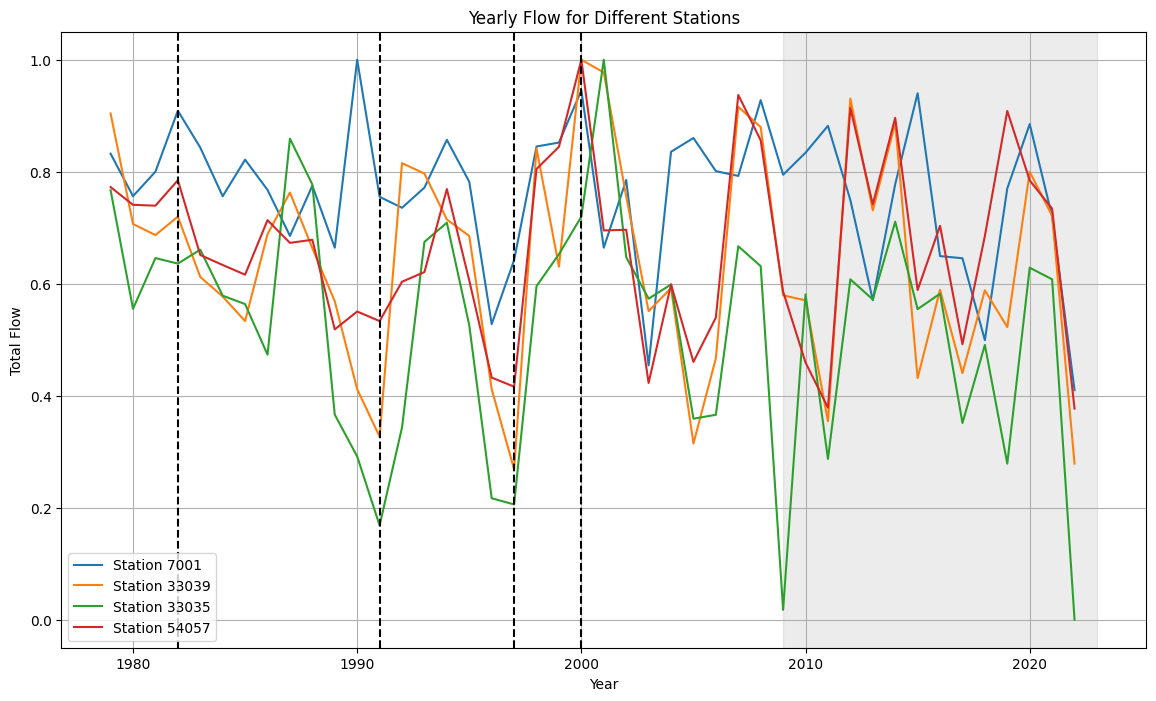

In [164]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))

# Iterate over each station to plot its data
for station in stations:
    plt.plot(rescaled_df.columns[1:], rescaled_df.loc[rescaled_df['Station'] == station].values.flatten()[1:], label=f'Station {station}')

plt.axvline(x = 1982, linestyle='--', color='black')
plt.axvline(x = 1991, linestyle='--', color='black')
plt.axvline(x = 1997, linestyle='--', color='black')
plt.axvline(x = 2000, linestyle='--', color='black')

# Define the date from which onwards the area should be shaded
highlight_start_date = 2009
plt.axvspan(highlight_start_date, 2023, color='grey', alpha=0.15)

# Add titles and labels
plt.title('Yearly Flow for Different Stations')
plt.xlabel('Year')
plt.ylabel('Total Flow')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

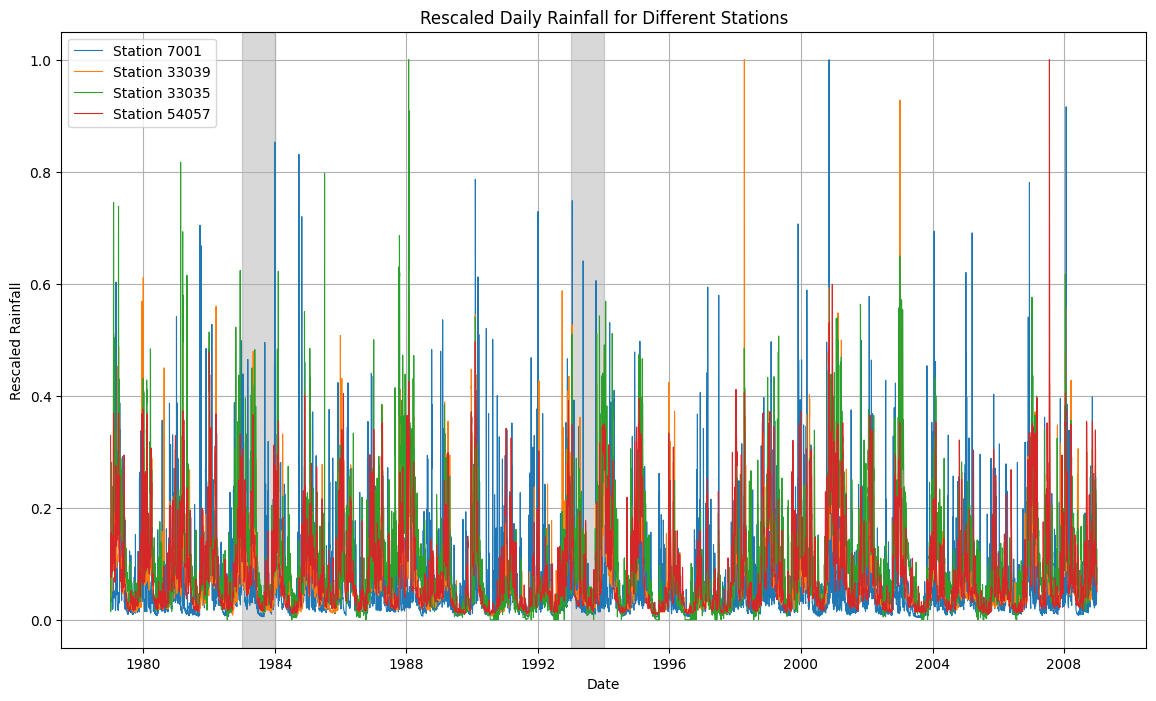

In [156]:
results = {}

# Iterate over each station
for station in stations:
    rain = get_flow_df(station)
    rain['Date'] = pd.to_datetime(rain['Date']) 
    
    rain = rain[rain['Date'] >= '1979-01-01']
    rain = rain[rain['Date']  <= '2009-01-01']
    
    rain['Rescaled_Flow'] = rain['Flow'] / rain['Flow'].max()
    results[station] = rain.set_index('Date')['Rescaled_Flow']

rescaled_flow_df = pd.DataFrame(results)

plt.figure(figsize=(14, 8))

# Iterate over each station to plot its rescaled data
for station in stations:
    plt.plot(rescaled_flow_df.index, rescaled_flow_df[station], label=f'Station {station}', linewidth=0.8)
    
highlight_years = ['1983', '1993']
for year in highlight_years:
    plt.axvspan(f'{year}-01-01', f'{year}-12-31', color='grey', alpha=0.3)

# Add titles and labels
plt.title('Rescaled Daily Rainfall for Different Stations')
plt.xlabel('Date')
plt.ylabel('Rescaled Rainfall')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [3]:
%%time

import glob
all_files = glob.glob(paths.WEATHER_UK + '/Rainfall_*.nc')
filtered_files = [f for f in all_files if 'aggregated' not in f]

full_rain_data = xr.open_mfdataset(filtered_files, concat_dim='time', combine='nested')
if not os.path.exists(paths.RAINFALL_HOURLY_UK):
    full_rain_data.to_netcdf(path=paths.RAINFALL_HOURLY_UK)

CPU times: total: 219 ms
Wall time: 1.61 s


In [3]:
db = pd.read_csv(paths.DATA + '/Catchments_Fens.csv')
db = db[:2]

In [4]:
for i in range(len(db)):
    db_path = paths.CATCHMENT_BASINS + '/' + str(db.loc[i][0])
    test = hydropoint.hydrobase(db.loc[i][0],
                        db_path + '/' + db.loc[i][3],
                        db_path + '/' + db.loc[i][4])
print(test)

C:\Users\aline\AppData\Local\Temp\ipykernel_29488\2786946273.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  db_path = paths.CATCHMENT_BASINS + '/' + str(db.loc[i][0])
C:\Users\aline\AppData\Local\Temp\ipykernel_29488\2786946273.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test = hydropoint.hydrobase(db.loc[i][0],
C:\Users\aline\AppData\Local\Temp\ipykernel_29488\2786946273.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

C:\Users\aline\AppData\Local\Temp\ipykernel_29488\2786946273.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  db_path = paths.CATCHMENT_BASINS + '/' + str(db.loc[i][0])
C:\Users\aline\AppData\Local\Temp\ipykernel_29488\2786946273.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test = hydropoint.hydrobase(db.loc[i][0],
C:\Users\aline\AppData\Local\Temp\ipykernel_29488\2786946273.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

In [5]:
domain_weather = xr.open_mfdataset([paths.RAINFALL_UK,
                                    paths.PRESSURE_UK])
weather = test.meteorological_extraction(domain_weather)
surface_data = xr.open_dataset(paths.SOIL_MOISTURE_UK)
surface = test.meteorological_extraction(surface_data)
weather

KeyboardInterrupt: 

In [6]:
domain_rain = xr.open_mfdataset([paths.RAINFALL_HOURLY_UK])
#domain_rain = domain_rain.isel(time=slice(0,10000))

rain_dataarray = domain_rain['tp'] 
print("Shape of rain DataArray after slicing:", rain_dataarray.shape)

Shape of rain DataArray after slicing: (753888, 49, 49)


In [7]:
import importlib
importlib.reload(hydropoint)

<module 'apollo.hydropoint' from 'C:\\Users\\aline\\soil-moisture-proxies\\apollo\\hydropoint.py'>

In [7]:
domain_rain

<xarray.Dataset> Size: 14GB
Dimensions:    (longitude: 49, latitude: 49, time: 753888)
Coordinates:
  * longitude  (longitude) float32 196B -8.0 -7.75 -7.5 -7.25 ... 3.5 3.75 4.0
  * latitude   (latitude) float32 196B 60.0 59.75 59.5 59.25 ... 48.5 48.25 48.0
  * time       (time) datetime64[ns] 6MB 1979-01-01 ... 2021-12-31T23:00:00
Data variables:
    tp         (time, latitude, longitude) float64 14GB dask.array<chunksize=(753888, 49, 49), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-14 11:50:12 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [11]:
%%time
domain_rain = domain_rain.chunk({'time': 24})
domain_rain = domain_rain.astype('float32')
domain_rain_test = domain_rain.isel(time=slice(0,48))

rain = test.meteorological_extraction(domain_rain_test)

#rain = test.daily_rain_extract(domain_rain)
rain['tp'] = rain['tp'] * 1000
rain

KeyboardInterrupt: 

In [20]:
specific_time_data = domain_rain_test.isel(time=0)
x = specific_time_data.compute().values
x

<bound method Mapping.values of <xarray.Dataset> Size: 10kB
Dimensions:    (latitude: 49, longitude: 49)
Coordinates:
  * longitude  (longitude) float32 196B -8.0 -7.75 -7.5 -7.25 ... 3.5 3.75 4.0
  * latitude   (latitude) float32 196B 60.0 59.75 59.5 59.25 ... 48.5 48.25 48.0
    time       datetime64[ns] 8B 1979-01-01
Data variables:
    tp         (latitude, longitude) float32 10kB 1.487e-06 ... 1.951e-05
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-14 11:50:12 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...>

In [26]:
rain['Hour'] = pd.to_datetime(rain['Time'], format='%H:%M:%S').dt.hour
pivot_df = rain.pivot(index='date', columns='Hour', values='Rain')
pivot_df.columns = [f"Rain_{i}" for i in pivot_df.columns]
pivot_df = pivot_df.rename(columns={'date': 'Date'})
pivot_df

Rain_0        Rain_1        Rain_2        Rain_3  \
date                                                                 
1979-01-01  2.913893e+17  5.088751e+17  4.613259e+17  4.786277e+17   
1979-01-02  2.110412e+17  4.109396e+16  3.196646e+16  1.014525e+17   
1979-01-03  4.912881e+15  7.973641e+15  8.703449e+15  9.343529e+15   
1979-01-04  6.906476e+03  6.906476e+03  6.906476e+03  6.906476e+03   
1979-01-05  6.906476e+03  6.906476e+03  6.906476e+03  6.906476e+03   
...                  ...           ...           ...           ...   
1979-04-06  4.847966e+19  5.387374e+17  8.692533e+17  4.847966e+19   
1979-04-07  4.847966e+19  6.906476e+03  1.308699e+17  4.847966e+19   
1979-04-08  1.426277e+19  4.847966e+19  1.460557e+18  4.847966e+19   
1979-04-09  6.906476e+03  4.847966e+19  1.090103e+18  4.847966e+19   
1979-04-10  2.454031e+18  4.847966e+19  5.628034e+17  4.847966e+19   

                  Rain_4        Rain_5        Rain_6        Rain_7  \
date                                                                 
1979-01-01  5.928164e+17  4.669489e+17  5.159994e+17  2.052230e+18   
1979-01-02  1.258993e+17  4.290961e+16  6.527468e+15  2.092310e+18   
1979-01-03  4.997512e+15  1.305588e+15  6.906476e+03  6.906476e+03   
1979-01-04  6.906476e+03  6.906476e+03  6.906476e+03  2.889274e+15   
1979-01-05  7.167548e+15  1.382371e+16  1.149111e+16  4.337101e+15   
...                  ...           ...           ...           ...   
1979-04-06  8.111089e+18  4.847966e+19  2.112751e+18  4.847966e+19   
1979-04-07  2.982897e+18  4.847966e+19  7.487058e+17  3.126125e+17   
1979-04-08  1.188693e+18  4.847966e+19  2.701387e+16  1.560078e+17   
1979-04-09  3.705204e+16  1.428198e+19  4.847966e+19  9.943922e+17   
1979-04-10  6.906476e+03  3.295696e+15  4.847966e+19  3.240115e+17   

                  Rain_8        Rain_9  ...       Rain_14       Rain_15  \
date                                    ...                               
1979-01-01  1.149040e+18  1.263931e+18  ...  1.688637e+18  2.256667e+17   
1979-01-02  1.667827e+18  5.948881e+16  ...  6.339639e+17  6.437135e+17   
1979-01-03  6.906476e+03  6.906476e+03  ...  3.133127e+15  3.133127e+15   
1979-01-04  6.906476e+03  6.906476e+03  ...  6.906476e+03  6.906476e+03   
1979-01-05  1.203974e+15  3.133127e+15  ...  3.133127e+15  5.221880e+15   
...                  ...           ...  ...           ...           ...   
1979-04-06  4.847966e+19  1.644029e+18  ...  2.155219e+17  4.847966e+19   
1979-04-07  4.847966e+19  5.052046e+18  ...  4.339505e+18  4.847966e+19   
1979-04-08  4.847966e+19  4.259094e+17  ...  2.409107e+18  4.847966e+19   
1979-04-09  4.847966e+19  1.118962e+18  ...  8.431129e+16  4.847966e+19   
1979-04-10  4.847966e+19  3.835242e+17  ...  1.652910e+18  4.847966e+19   

                 Rain_16       Rain_17       Rain_18       Rain_19  \
date                                                                 
1979-01-01  1.355749e+17  2.372265e+17  4.730420e+17  5.787097e+17   
1979-01-02  1.342683e+17  2.074741e+16  1.622656e+16  1.203974e+15   
1979-01-03  6.906476e+03  6.906476e+03  6.906476e+03  6.906476e+03   
1979-01-04  6.906476e+03  6.906476e+03  6.906476e+03  6.906476e+03   
1979-01-05  3.133127e+15  6.906476e+03  6.906476e+03  6.906476e+03   
...                  ...           ...           ...           ...   
1979-04-06  7.114737e+18  4.847966e+19  7.707890e+17  1.512841e+19   
1979-04-07  1.029872e+18  4.847966e+19  6.906476e+03  6.906476e+03   
1979-04-08  3.363370e+18  4.847966e+19  4.847966e+19  4.648223e+18   
1979-04-09  1.745454e+17  6.084806e+16  4.847966e+19  3.823598e+17   
1979-04-10  1.536489e+18  4.543917e+18  4.847966e+19  9.668656e+16   

                 Rain_20       Rain_21       Rain_22       Rain_23  
date                                                                
1979-01-01  6.357485e+17  5.200139e+17  4.939557e+17  4.058546e+17  
1979-01-02  6.906476e+03  6.906476e+03  3.454680e+14  4.669028e+15  
1979-01-03  6.906476e+03  6.90647

In [7]:
year = 1979
domain_weather = xr.open_mfdataset([paths.WEATHER_UK + f"/Rainfall_{year}.nc"])
domain_weather.to_dataframe()

tp
longitude latitude time                             
-8.0      60.0     1979-01-01 00:00:00  1.486517e-06
                   1979-01-01 01:00:00  6.633582e-05
                   1979-01-01 02:00:00  1.244958e-05
                   1979-01-01 03:00:00  5.202810e-06
                   1979-01-01 04:00:00  8.673617e-19
...                                              ...
 4.0      48.0     1979-12-31 19:00:00  6.088402e-03
                   1979-12-31 20:00:00  3.530478e-05
                   1979-12-31 21:00:00  6.088402e-03
                   1979-12-31 22:00:00  2.584682e-04
                   1979-12-31 23:00:00  6.088402e-03

[21032760 rows x 1 columns]

In [6]:
domain_weather = xr.open_mfdataset([paths.RAINFALL_UK])
domain_weather.to_dataframe()

tp
time       latitude longitude              
1979-01-01 60.0     -8.00      1.354849e-05
                    -7.75      1.947910e-05
                    -7.50      2.542520e-05
                    -7.25      2.977638e-05
                    -7.00      3.393396e-05
...                                     ...
2021-12-31 48.0      3.00      3.632158e-08
                     3.25      1.839362e-08
                     3.50      1.839362e-08
                     3.75      1.839362e-08
                     4.00      3.632158e-08

[37710106 rows x 1 columns]

In [6]:
domain_weather = xr.open_mfdataset([paths.RAINFALL_UK_SHIFTED])
domain_weather.to_dataframe()

tp
longitude latitude time                    
-8.0      60.0     1979-01-01  7.841378e-06
                   1979-01-02  1.287928e-04
                   1979-01-03  1.250765e-04
                   1979-01-04  5.525663e-05
                   1979-01-05  3.712731e-04
...                                     ...
 4.0      48.0     2021-12-27  2.950262e-04
                   2021-12-28  3.465652e-04
                   2021-12-29  6.249978e-04
                   2021-12-30  4.726053e-05
                   2021-12-31  3.587818e-08

[37710106 rows x 1 columns]

In [8]:
year = 1979
da = xr.open_mfdataset([paths.WEATHER_UK + f"/Rainfall_{year}_shifted_aggregated.nc"])
da.to_dataframe()

tp
longitude latitude time                
-8.0      60.0     1978-12-31  0.000023
                   1979-01-01  0.000024
                   1979-01-02  0.000178
                   1979-01-03  0.000075
                   1979-01-04  0.000058
...                                 ...
 4.0      48.0     1979-12-27  0.006088
                   1979-12-28  0.006088
                   1979-12-29  0.006088
                   1979-12-30  0.006088
                   1979-12-31  0.006088

[878766 rows x 1 columns]

tp
longitude latitude time                
-8.0      60.0     1979-01-01  0.000014
                   1979-01-02  0.000129
                   1979-01-03  0.000125
                   1979-01-04  0.000055
                   1979-01-05  0.000371
...                                 ...
 4.0      48.0     1979-12-27  0.006088
                   1979-12-28  0.006088
                   1979-12-29  0.006088
                   1979-12-30  0.006088
                   1979-12-31  0.006088

[876365 rows x 1 columns]

In [34]:
import numpy as np

year = 2021

domain_weather = xr.open_mfdataset([paths.WEATHER_UK + f"/Rainfall_{year}.nc"])

time_index = pd.DatetimeIndex(domain_weather.time.values)
start_time = time_index[time_index.hour == 9][0]

modified_current_year = domain_weather.sel(time=slice(start_time, None))

if year+1 <= 2021:

    next_year_domain_weather = xr.open_mfdataset([paths.WEATHER_UK + f"/Rainfall_{year + 1}.nc"])

    time_index = pd.DatetimeIndex(next_year_domain_weather.time.values)
    end_time_9h = time_index[time_index.hour == 8][0]
    modified_next_year = next_year_domain_weather.sel(time=slice(None, end_time_9h))

    combined_weather = xr.concat([modified_current_year, modified_next_year], dim='time')
    
else:
    
    end_time = time_index[time_index.hour == 8][0]
    combined_weather = domain_weather.sel(time=slice(None, end_time))

cache = combined_weather.resample(time='24H').mean('time')

combined_weather.time

C:\Users\aline\AppData\Local\Programs\Python\Python310\lib\site-packages\xarray\core\groupby.py:668: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index_grouper = pd.Grouper(


<xarray.DataArray 'time' (time: 9)> Size: 72B
array(['2021-01-01T00:00:00.000000000', '2021-01-01T01:00:00.000000000',
       '2021-01-01T02:00:00.000000000', '2021-01-01T03:00:00.000000000',
       '2021-01-01T04:00:00.000000000', '2021-01-01T05:00:00.000000000',
       '2021-01-01T06:00:00.000000000', '2021-01-01T07:00:00.000000000',
       '2021-01-01T08:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 72B 2021-01-01 ... 2021-01-01T08:00:00
Attributes:
    long_name:  time

In [ ]:
station_number = 7001
df_daily_rain = pd.read_csv(paths.CATCHMENT_BASINS + '/' + station_number + f"/{station_number}_daily_rain.csv")

In [3]:
import paths
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
station_number = str(33039)
df_rain = pd.read_csv(paths.CATCHMENT_BASINS + '/' + station_number + f"/{station_number}_daily_rain.csv")
df_rain.iloc[:, 1:] = df_rain.iloc[:, 1:].applymap(lambda x: 0 if x > 4 else x)
df_rain = df_rain.rename(columns={'date': 'Date'})
df_rain['Date'] = pd.to_datetime(df_rain['Date'])

df_rain_summary = df_rain.copy()
df_rain_summary['total_rain'] = df_rain_summary[[f"Rain_{i}" for i in range(24)]].sum(axis=1)
#df_rain_summary = df_rain_summary[['Date', 'total_rain']]

df_rain

C:\Users\aline\AppData\Local\Temp\ipykernel_19892\476036791.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_rain.iloc[:, 1:] = df_rain.iloc[:, 1:].applymap(lambda x: 0 if x > 4 else x)


Date        Rain_0        Rain_1        Rain_2        Rain_3  \
0     1979-01-01  1.486098e-02  1.641077e-02  1.038424e-02  6.349902e-03   
1     1979-01-02  3.546346e-02  9.711350e-02  4.697503e-02  9.399153e-03   
2     1979-01-03  4.839166e-04  8.673617e-16  8.673617e-16  8.673617e-16   
3     1979-01-04  8.673617e-16  8.673617e-16  8.673617e-16  8.673617e-16   
4     1979-01-05  8.673617e-16  8.673617e-16  8.673617e-16  8.673617e-16   
...          ...           ...           ...           ...           ...   
15701 2021-12-27  3.004343e-03  3.811759e-03  3.315589e-03  3.484164e-03   
15702 2021-12-28  5.764075e-03  9.880211e-05  7.942586e-03  2.592670e-03   
15703 2021-12-29  9.883544e-04  6.469219e-04  2.693352e-03  3.444147e-03   
15704 2021-12-30  4.651624e-02  2.799884e-03  1.139221e-03  1.139221e-03   
15705 2021-12-31  3.600188e-04  1.800094e-04  8.673617e-16  8.673617e-16   

             Rain_4        Rain_5        Rain_6        Rain_7        Rain_8  \
0      2.336263e-03  9.145333e-04  8.065277e-04  9.375962e-05  8.673617e-16   
1      2.170499e-03  8.673617e-16  8.673617e-16  8.673617e-16  8.673617e-16   
2      8.673617e-16  8.673617e-16  8.673617e-16  8.673617e-16  8.673617e-16   
3      8.673617e-16  8.673617e-16  8.673617e-16  8.673617e-16  8.673617e-16   
4      8.673617e-16  8.673617e-16  8.673617e-16  8.673617e-16  4.839166e-04   
...             ...           ...           ...           ...           ...   
15701  4.563631e-03  1.207732e-02  4.159165e-03  4.796349e-04  8.673617e-16   
15702  4.065932e-03  1.056728e-01  4.968303e-01  6.296356e-01  1.477357e+00   
15703  7.004267e-02  2.040162e-01  4.790522e-01  4.692979e-01  1.118374e-01   
15704  3.108713e-03  9.290732e-04  4.938810e-04  8.673617e-16  9.497355e-06   
15705  8.673617e-16  1.358922e-03  8.317571e-03  1.018008e+00  1.430840e+00   

       ...       Rain_14       Rain_15       Rain_16       Rain_17  \
0      ...  1.800094e-04  3.906379e-03  2.047061e-02  3.615434e-02   
1      ...  5.775375e-03  5.141587e-03  5.824801e-03  7.386665e-03   
2      ...  8.673617e-16  8.673617e-16  8.673617e-16  8.673617e-16   
3      ...  1.800094e-04  8.673617e-16  8.673617e-16  8.673617e-16   
4      ...  4.839166e-04  3.901570e-04  8.673617e-16  8.673617e-16   
...    ...           ...           ...           ...           ...   
15701  ...  1.431278e-01  3.373428e-01  1.945847e-01  1.528405e-02   
15702  ...  2.094407e-02  1.101494e-02  5.198874e-03  5.198874e-03   
15703  ...  6.684338e-03  8.673617e-16  8.673617e-16  8.673617e-16   
15704  ...  8.673617e-16  2.057150e-03  2.358654e-03  8.673617e-16   
15705  ...  1.778051e-03  5.389162e-04  3.226111e-04  4.046703e-03   

            Rain_18       Rain_19       Rain_20       Rain_21       Rain_22  \
0      5.325176e-02  1.181482e-01  1.023263e-01  4.897705e-02  2.995228e-02   
1      8.306241e-03  1.192107e-03  1.886057e-03  1.915610e-03  8.800550e-04   
2      8.673617e-16  8.673617e-16  8.673617e-16  8.673617e-16  8.673617e-16   
3      8.673617e-16  8.673617e-16  8.673617e-16  8.673617e-16  8.673617e-16   
4      5.574439e-04  8.658089e-04  5.431979e-04  4.839166e-04  8.673617e-16   
...             ...           ...           ...           ...           ...   
15701  9.000471e-04  1.667131e-02  2.634293e-01  4.561094e-01  2.648649e-01   
15702  3.368817e-03  2.777135e-03  8.065277e-04  2.601047e-04  8.673617e-16   
15703  8.673617e-16  8.673617e-16  2.384243e-02  4.929950e-02  3.387042e-03   
15704  2.601047e-04  2.471702e-03  3.016719e-03  1.797463e-03  3.034608e-03   
15705  3.712718e-03  9.239693e-02  9.796415e-03  2.346894e-02  2.168976e-03   

            Rain_23  
0      2.837152e-02  
1      4.839166e-04  
2      8.673617e-16  
3      8.673617e-16  
4      8.673617e-16  
...             ...  
15701  1.580094e-01  
15702  8.673617e-16  
15703  1.198216e-01  
15704  8.945948e-04  
15705  9.497355e-06  

[15706 rows x 25 columns]

In [6]:
daily_df = pd.read_csv(paths.CATCHMENT_BASINS + '/' + station_number + f"/{station_number}_lumped.csv")
daily_df['Date'] = pd.to_datetime(daily_df['Date'])
daily_df = daily_df[['Date', 'Rain']]
combined_df = pd.merge(df_rain_summary, daily_df, on='Date')
combined_df

Date    Rain_0    Rain_1        Rain_2        Rain_3  \
0     1979-06-29  0.000000  0.018417  0.000000e+00  9.442573e-01   
1     1979-06-30  0.000000  0.015666  0.000000e+00  8.673617e-16   
2     1979-07-01  0.000000  0.664758  0.000000e+00  5.285017e-02   
3     1979-07-02  0.000000  0.219907  1.179638e+00  0.000000e+00   
4     1979-07-03  0.000000  0.187746  2.002925e-01  0.000000e+00   
...          ...       ...       ...           ...           ...   
15522 2021-12-27  0.003004  0.003812  3.315589e-03  3.484164e-03   
15523 2021-12-28  0.005764  0.000099  7.942586e-03  2.592670e-03   
15524 2021-12-29  0.000988  0.000647  2.693352e-03  3.444147e-03   
15525 2021-12-30  0.046516  0.002800  1.139221e-03  1.139221e-03   
15526 2021-12-31  0.000360  0.000180  8.673617e-16  8.673617e-16   

             Rain_4    Rain_5    Rain_6        Rain_7        Rain_8  ...  \
0      0.000000e+00  0.000000  0.155075  0.000000e+00  3.029006e-02  ...   
1      8.673617e-16  0.000000  0.010660  0.000000e+00  6.709443e-01  ...   
2      1.129200e-01  0.000000  0.349631  0.000000e+00  8.673617e-16  ...   
3      1.029641e-02  0.000000  1.086084  0.000000e+00  2.627047e-01  ...   
4      4.574672e-01  0.000000  0.635982  1.179638e+00  0.000000e+00  ...   
...             ...       ...       ...           ...           ...  ...   
15522  4.563631e-03  0.012077  0.004159  4.796349e-04  8.673617e-16  ...   
15523  4.065932e-03  0.105673  0.496830  6.296356e-01  1.477357e+00  ...   
15524  7.004267e-02  0.204016  0.479052  4.692979e-01  1.118374e-01  ...   
15525  3.108713e-03  0.000929  0.000494  8.673617e-16  9.497355e-06  ...   
15526  8.673617e-16  0.001359  0.008318  1.018008e+00  1.430840e+00  ...   

            Rain_16       Rain_17       Rain_18       Rain_19   Rain_20  \
0      1.179638e+00  0.000000e+00  3.632219e-02  0.000000e+00  0.018677   
1      9.060658e-02  0.000000e+00  8.673617e-16  0.000000e+00  0.175621   
2      9.490671e-02  0.000000e+00  5.589066e-01  0.000000e+00  0.164605   
3      8.673617e-16  0.000000e+00  1.392760e-01  0.000000e+00  0.000000   
4      2.110951e-01  0.000000e+00  7.823560e-03  8.610022e-02  0.000000   
...             ...           ...           ...           ...       ...   
15522  1.945847e-01  1.528405e-02  9.000471e-04  1.667131e-02  0.263429   
15523  5.198874e-03  5.198874e-03  3.368817e-03  2.777135e-03  0.000807   
15524  8.673617e-16  8.673617e-16  8.673617e-16  8.673617e-16  0.023842   
15525  2.358654e-03  8.673617e-16  2.601047e-04  2.471702e-03  0.003017   
15526  3.226111e-04  4.046703e-03  3.712718e-03  9.239693e-02  0.009796   

        Rain_21       Rain_22       Rain_23  total_rain      Rain  
0      0.000000  4.595811e-02  2.347091e-02    2.527420  0.072360  
1      1.179638  0.000000e+00  1.032360e-02    2.428921  0.407522  
2      0.179444  0.000000e+00  7.352730e-05    2.651497  0.061370  
3      0.095252  0.000000e+00  2.551734e-01    4.066403  0.019252  
4      0.001108  0.000000e+00  8.308475e-03    3.341596  0.008066  
...         ...           ...           ...         ...       ...  
15522  0.456109  2.648649e-01  1.580094e-01    2.741791  2.741783  
15523  0.000260  8.673617e-16  8.673617e-16    5.696255  5.696018  
15524  0.049299  3.387042e-03  1.198216e-01    2.206684  2.206835  
15525  0.001797  3.034608e-03  8.945948e-04    0.079123  0.079345  
15526  0.023469  2.168976e-03  9.497355e-06    2.685449  2.685433  

[15527 rows x 27 columns]

1.7985986371050626 0.75


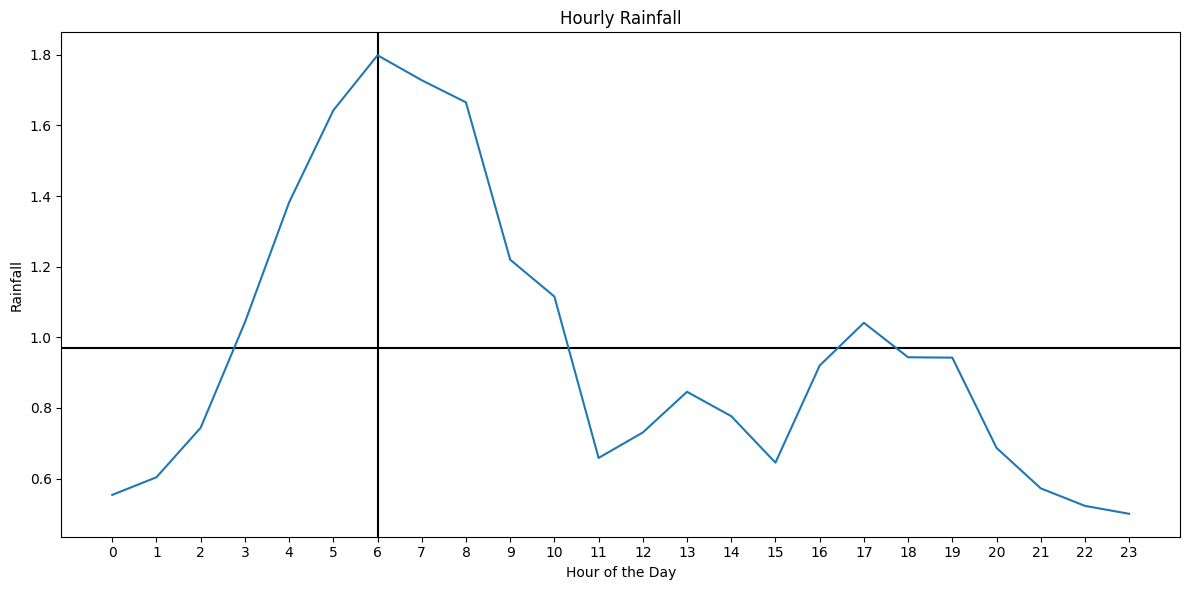

In [10]:
import matplotlib.pyplot as plt

# Set the x-axis as hours
hours = list(range(24))

# Plot each row (each day) as a separate line
plt.figure(figsize=(12, 6))

year = 2000
month = 4

df_filtered = df_rain[(df_rain['Date'].dt.year == year) & (df_rain['Date'].dt.month == month)]

selected = df_filtered[2:3]
mean = selected[[f"Rain_{i}" for i in range(24)]].sum(axis=1)/24
plt.axhline(y = mean.iloc[0], color='black')

max_x = df_filtered.iloc[2, 1:].idxmax()
max_index = int(max_x.split('_')[1])
plt.axvline(x = max_index, color='black')

MAX = df_filtered.iloc[2, 1:].max()
MAX_DIST = (24-max_index)/24

print(MAX, MAX_DIST)

for index, row in df_filtered[2:3].iterrows():
    plt.plot(hours, row[1:], label=row['Date'])
    
# Add titles and labels
plt.title('Hourly Rainfall')
plt.xlabel('Hour of the Day')
plt.ylabel('Rainfall')
#plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(hours)  # Ensure x-axis shows all hours

# Display the plot
plt.tight_layout()
plt.show()


In [21]:
df_rain['total_rain'] = df_rain[[f"Rain_{i}" for i in range(24)]].sum(axis=1)/24/24
df_rain[['date', 'total_rain']]

NameError: name 'df_rain' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(df['Date'], df['Flow'], lw=3.2, ls='--')
ax.set_xlabel('Date')
ax.set_ylabel('Flow (m'+r'$^3$'+'s'+r'$^{-1}$'+')')
ax.set_xlim([dt.date(year, 1, 1), dt.date(year, 12, 31)])
ax.set_ylim(0,maxflow)
ax.xaxis.set_major_locator(mdt.MonthLocator())
ax.xaxis.set_major_formatter(mdt.DateFormatter('%b'))
ax.yaxis.set_major_locator(mtk.MaxNLocator(5))
ax.legend(['Prediction', 'Actual'], loc='upper left')
ax.grid(c='black', ls='dotted', lw=0.5)
plt.show()

NameError: name 'dt' is not defined

Error in callback <function _draw_all_if_interactive at 0x000002C81219DF30> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 